## Feature extraction 

In [77]:
from jl_song_data import SongData 
import pandas as pd

In [2]:
data = SongData('../data/chords_clean_1_2_3_4_5_6.csv')

In [3]:
df = data.df

In [4]:
from jl_feature_extractor import FeatureExtractor    

feature_extractor = FeatureExtractor()

## Remove non valid chords 

This `eval` is to convert string column to array colum

In [5]:
df['chords'] = df['chords'].apply(eval)

In [6]:
from jl_chord_parser import ChordParser
parser = ChordParser()

Parse returns `None` if chord is not valid

In [7]:
df['chords'] = \
    df['chords'].apply(\
        lambda chords: [chord for chord in chords if parser.parse(chord) is not None] )\


##  Extract artist 

In [8]:
df['artist'] = df['url'].apply(feature_extractor.extract_pretty_artist)

In [9]:
df.sample(10)

,url,name,decade,genre,chords,uuid,artist
8812,https://tabs.ultimate-guitar.com/tab/missy-hig...,The Special Two (ver 5),2000s,Folk,"[Am, G/B, C, Am, G/B, C, Am, G/B, C, Am, G/B, ...",3b14b024-e076-4d80-87e8-bd9e134c12f9,Missy Higgins
2908,https://tabs.ultimate-guitar.com/tab/dc-talk/d...,Day By Day (ver 2),1990s,Religious Music,"[E, D, E, D, E, E, A, F, G, E, A, F, G, E, G, ...",b19386a5-f50a-4a56-938f-496d09db1eb1,Dc Talk
3250,https://tabs.ultimate-guitar.com/tab/django-re...,Minor Swing,1950s,Jazz,"[Am6, Dm6, E7, Am6, Dm6, Am6, E7, Am6, E7, E7#...",f7ec5d0d-5f60-4b34-b20f-8c65b7ee5db9,Django Reinhardt
11764,https://tabs.ultimate-guitar.com/tab/tammy_wyn...,I Dont Wanna Play House,1960s,Country,"[C, G, C, G, F, C, D, G, C, G, C, E, Am, C, F,...",35199008-bcfd-4ce9-a8a3-62cd114dd1df,Tammy Wynette
4840,https://tabs.ultimate-guitar.com/tab/george-be...,In Your Eyes,1980s,Jazz%%Jazz,"[E, Gb, E, Gb, B, B, E, Gb, G, A, B, E, Gb, A,...",ea6d60c5-762f-4cab-b585-6b5b0773a183,George Benson
172,https://tabs.ultimate-guitar.com/tab/a-ha/livi...,Living A Boys Adventure Tale,1980s,Electronic,"[D, E, F#m, Bm, C#m, D, E, A, D, A, F#m, D, A,...",d2caacc6-f3d9-411b-961f-8c53287500a6,A Ha
5470,https://tabs.ultimate-guitar.com/tab/hillsong-...,Lead Me To The Cross (ver 5),2000s,Religious Music%%Religious Music,"[Am, Em7, F, Gsus, G, Am7, Em, F, Gsus, G, Dm,...",0b10faae-eb5f-4e19-a010-efebeacc033a,Hillsong United
10271,https://tabs.ultimate-guitar.com/tab/reamonn/s...,Supergirl (ver 2),2000s,Rock,"[Em, Bm, Am, C, Em, Bm, Am, C, G, D, Em, C, G,...",a634152c-1be0-49e3-b3a4-3296c67d2b5f,Reamonn
13095,https://tabs.ultimate-guitar.com/tab/tom_waits...,Way Down In The Hole,1980s,Folk%%Folk,"[Bm, Bm, E, Bm, Bm, F#7, E, Bm, Bm, E, Bm, Bm,...",9f66e630-a3a0-4a1a-a4b3-754bd9eb40d1,Tom Waits
6402,https://tabs.ultimate-guitar.com/tab/john-lenn...,Working Class Hero,1970s,Folk%%Folk%%Rock,"[Am, Am, Am, Am, G, Am, Am, G, Am, Am, G, Am, ...",7c4dea97-0638-4340-b332-945a4e4b6133,John Lennon


## Extract decade as numeric 

In [10]:
df['decade'].unique()

array(['1980s', '2000s', '2010s', '1990s', '1960s', '1970s', '1950s'],
      dtype=object)

In [11]:
df['decade'] = df['decade'].apply(feature_extractor.extract_numeric_decade)

In [12]:
df['decade'].unique()

array([1980, 2000, 2010, 1990, 1960, 1970, 1950])

## Harmonics features 

We are going to extract all the harmonic features, i.e. related to chords. 

### Cardinality (number of chords) 

In [13]:
df['cardinality'] = df['chords'].apply(feature_extractor.extract_cardinality)

In [14]:
df.sample(10)

,url,name,decade,genre,chords,uuid,artist,cardinality
5242,https://tabs.ultimate-guitar.com/tab/haddaway/...,I Miss You,1990,Electronic,"[F#m, E, A, D, A, E, F#m, E, F#m, Bm, A, E, F#...",99b5d45b-3b90-437f-89cc-22f03ae3406b,Haddaway,58
5493,https://tabs.ultimate-guitar.com/tab/hillsong-...,Oceans Where Feet May Fail (ver 15),2010,Religious Music,"[Am, C/A#, C, G, F, Am, C/A#, C, G, F, Am, G/B...",d2e03c8e-58af-4230-bb50-42d8eb45fd1e,Hillsong United,121
13011,https://tabs.ultimate-guitar.com/tab/tom_petty...,Learning To Fly,1990,Rock,"[F, C, Am, G, F, C, Am, G, F, C, Am, G, F, C, ...",e9de4976-00e2-4888-a6ef-863e1461a2be,Tom Petty And The Heartbreakers,136
3307,https://tabs.ultimate-guitar.com/tab/don-henle...,Dirty Laundry (ver 2),1980,Pop,"[E, A, D, G, B, E7, E7, E7/D, E7/D, E7/A, Em7/...",cb49611a-293c-463e-a2cd-4e86357002e7,Don Henley,159
11123,https://tabs.ultimate-guitar.com/tab/simply_re...,For Your Babies,1990,Rhythm And Blues,"[Amaj7, Bm7/A, Dm, A, A, Amaj7, Bm7/A, Dm, A, ...",85c29ab6-1412-4c42-8a98-38d1e8512e2c,Simply Red,123
5567,https://tabs.ultimate-guitar.com/tab/hooverpho...,Mad About You,2000,Electronic%%Pop,"[C#m, B, A, G#m, C#m, B, A, G#m, C#m, B, A, G#...",a893c7a7-49f9-43a3-a968-6eabf65c9398,Hooverphonic,105
13284,https://tabs.ultimate-guitar.com/tab/turnpike_...,Every Girl,2000,Country,"[G, C, Em, G, C, G, Em, C, G, G, G, C, G, Em, ...",40f87b7f-c182-4ffd-b5df-bad5cdc59734,Turnpike Troubadours,115
11201,https://tabs.ultimate-guitar.com/tab/slipknot/...,Custer,2010,Metal,"[Em, F, Em, Em, Em, Em, Em, C, Em, Am, F, C, E...",16063935-839c-4c72-8659-7631069e3240,Slipknot,146
2545,https://tabs.ultimate-guitar.com/tab/cliff-ric...,We Dont Talk Anymore,1970,Pop%%Pop,"[A, Amaj9, Amaj9, A, Amaj9, A, Amaj9, Bm/A, A,...",517e12d2-3d9a-4012-9e0f-4c8ca8c59d78,Cliff Richard,168
12675,https://tabs.ultimate-guitar.com/tab/the_rolli...,Jumpin Jack Flash (ver 2),1960,Rock,"[A, G, A, A, G, A, G, A, A, G, A, G, A, A, G, ...",e9fa8972-2640-4865-beb8-fd9690ffe1ae,The Rolling Stones,158


In [15]:
df['cardinality'].describe()

count    14114.000000
mean        85.521468
std         68.705570
min          0.000000
25%         51.000000
50%         77.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

In [16]:
df[df['cardinality'] == 0]

,url,name,decade,genre,chords,uuid,artist,cardinality
19,https://tabs.ultimate-guitar.com/tab/120815,Balladen Om Herr Fredrik Åkare Och Den Söta Fr...,1960,Jazz,[],752b3d65-297f-4777-acc4-e9d92e243a72,Unknown,0
160,https://tabs.ultimate-guitar.com/tab/883/cumul...,Cumuli,1990,Electronic,[],523bfc79-9f5d-4747-8db3-366bd5d32152,883,0
163,https://tabs.ultimate-guitar.com/tab/883/rotta...,Rotta X Casa Di Dio,1990,Electronic%%Electronic,[],8c8a69f6-7027-4816-a91d-d219d87582ca,883,0
217,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 3),1970,Pop,[],044a35a5-3943-49a5-bb6a-e0f5e19776cf,Abba,0
218,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 4),1970,Pop%%Pop%%Pop,[],bb8e839f-0d3f-40b6-9ee3-5fd4aa0301e1,Abba,0
...,...,...,...,...,...,...,...,...
12490,https://tabs.ultimate-guitar.com/tab/the_lonel...,Like A Boss,2000,Hip Hop,[],1a6d53ae-aeea-4bdd-a1e2-3100bbf3c88e,The Lonely Island,0
13107,https://tabs.ultimate-guitar.com/tab/tony_benn...,A Child Is Born,1970,Jazz,[],1dc741fc-51a9-40ef-a328-48eb8a467b62,Tony Bennett,0
13369,https://tabs.ultimate-guitar.com/tab/tyler_the...,Answer,2010,Hip Hop,[],8474fdc1-00c5-457a-9178-41b1bb48a21f,Tyler The Creator,0
13802,https://tabs.ultimate-guitar.com/tab/wham/free...,Freedom,1980,Rhythm And Blues%%Rhythm And Blues%%Rhythm And...,[],f0a72548-c85e-4848-bf60-af2e62993f5d,Wham,0


Some songs are been uploaded by user/ultimate guitar without including the special format for the chords, for example, in https://tabs.ultimate-guitar.com/tab/883/rotta-x-casa-di-dio-chords-89055. Let's remove them

In [17]:
df = df[df['cardinality'] != 0]

In [18]:
df['cardinality'].describe()

count    14043.000000
mean        85.953856
std         68.608710
min          1.000000
25%         51.000000
50%         77.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

The same occurs for songs with one or two chords (eg. https://tabs.ultimate-guitar.com/tab/mad-caddies/souls-for-sale-chords-837415)

In [19]:
df = df[df['cardinality'] != 1]

In [20]:
df = df[df['cardinality'] != 2]

In [21]:
df['cardinality'].describe()

count    14031.000000
mean        86.026014
std         68.593639
min          3.000000
25%         51.000000
50%         78.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

In [22]:
df['cardinality'].mode()

0    68
1    72
dtype: int64

Total number of chords

In [23]:
df['cardinality'].sum()

1207031

In [24]:
import matplotlib.pyplot as plt

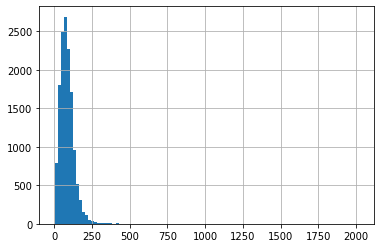

In [25]:
df['cardinality'].hist(bins=100)

#### By genre 

In [92]:
import jl_io as io

genres = io.from_file('../data/genres')

In [93]:
genre_names = [genre['name'] for genre in genres]
genre_names

['Rock',
 'Folk',
 'Pop',
 'Country',
 'Electronic',
 'Rhythm And Blues',
 'Metal',
 'Contemporary R&b',
 'Religious Music',
 'Hip Hop',
 'Reggae',
 'Jazz',
 'Blues',
 'World Music',
 'Disco',
 'Comedy',
 'New Age',
 'Classical',
 'Experimental',
 'Darkwave',
 'Soundtrack']

In [99]:
genre_df = pd.DataFrame(genre_names, columns=['genre'])

In [100]:
def create_genre_avg_column_and_show(column_name):
    genre_df[f'avg {column_name}'] = genre_df['genre'].apply( \
        lambda genre: df[df['genre'].str.contains(genre)][column_name].mean())
    
    genre_df.sort_values(by=f'avg {column_name}', ascending=False).plot.bar(x='genre', y=f'avg {column_name}')
    

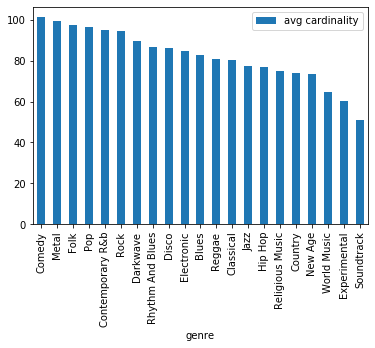

In [101]:
create_genre_avg_column_and_show('cardinality')

### Unique cardinality (number of different chords) 

In [26]:
df['unique cardinality'] = df['chords'].apply(feature_extractor.extract_unique_cardinality)

In [27]:
df['unique cardinality'].describe()

count    14031.000000
mean         7.629606
std          5.418258
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max        101.000000
Name: unique cardinality, dtype: float64

Mode is 4...modern music is not very rich...

In [28]:
df['unique cardinality'].mode()

0    4
dtype: int64

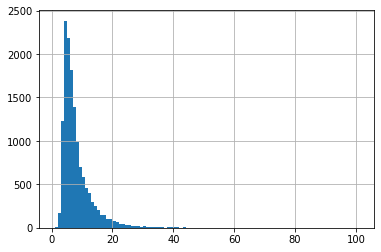

In [29]:
df['unique cardinality'].hist(bins=100)

In [30]:
pop = df[df['genre'].str.contains('Pop')]

In [31]:
jazz = df[df['genre'].str.contains('Jazz')]

In [32]:
pop['unique cardinality'].mode()

0    5
dtype: int64

In [33]:
jazz['unique cardinality'].mode()

0    6
dtype: int64

#### By genre 

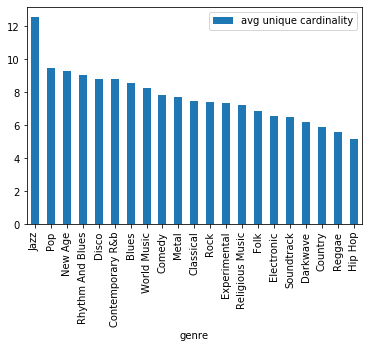

In [102]:
create_genre_avg_column_and_show('unique cardinality')

### Mode

Major :)

Minor :(

Neutral :|

In [34]:
from jl_extended_chord import ChordMode

In [35]:
df['major cardinality'] =\
df['chords'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Major))

In [36]:
df['minor cardinality'] =\
df['chords'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Minor))

In [37]:
df['neutral cardinality'] =\
df['chords'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Neutral))

In [38]:
def show_info(series):
    print(series.describe())
    print(f"Mode:{series.mode()}")
    series.hist(bins=100)

count    14031.000000
mean        60.802437
std         51.953680
min          0.000000
25%         34.000000
50%         53.000000
75%         78.000000
max       1871.000000
Name: major cardinality, dtype: float64
Mode:0    40
dtype: int64


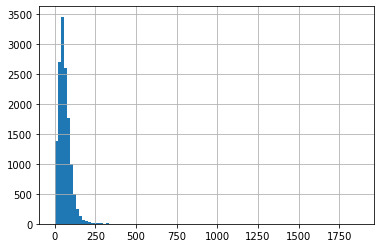

In [39]:
show_info(df['major cardinality'])

count    14031.000000
mean        22.596394
std         27.375530
min          0.000000
25%          6.000000
50%         17.000000
75%         32.000000
max       1022.000000
Name: minor cardinality, dtype: float64
Mode:0    0
dtype: int64


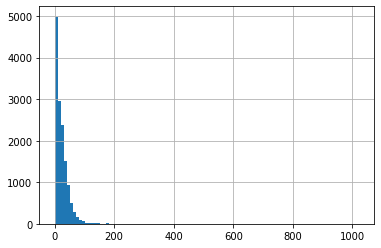

In [40]:
show_info(df['minor cardinality'])

In average, there are three times more major chords than minor chords. It is the expected discovery

count    14031.000000
mean         2.627183
std         12.161789
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        318.000000
Name: neutral cardinality, dtype: float64
Mode:0    0
dtype: int64


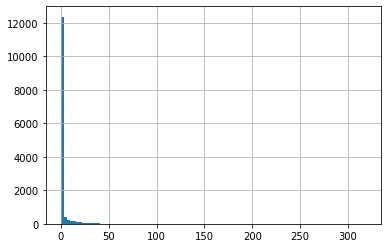

In [41]:
show_info(df['neutral cardinality'])

In [42]:
df[df['neutral cardinality'] == 318]

,url,name,decade,genre,chords,uuid,artist,cardinality,unique cardinality,major cardinality,minor cardinality,neutral cardinality
10816,https://tabs.ultimate-guitar.com/tab/scorpions...,Rock You Like A Hurricane (ver 2),1980,Metal,"[E5, G5, A5, C5, D5, C5, E5, C5, E5, D5, C5, E...",564b6999-b037-4758-9b15-3adc9b88357a,Scorpions,318,5,0,0,318


Scorpions like removing the third... :)

### Sadness  

Let's use previous features to calculate a new feature: `sadness`

In [58]:
df['sadness'] = (df['minor cardinality'] / df['cardinality'])


In [59]:
df['sadness'].describe()

count    14031.000000
mean         0.257273
std          0.201813
min          0.000000
25%          0.096872
50%          0.243590
75%          0.375000
max          1.000000
Name: sadness, dtype: float64

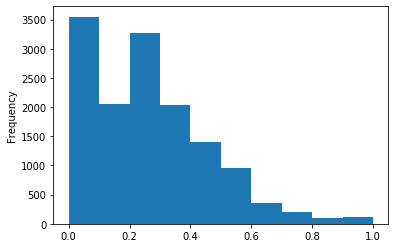

In [60]:
df['sadness'].plot.hist()

In [68]:
df[df['genre'].str.contains('Metal')]['sadness'].mean()

0.2790716907934111

In [69]:
df[df['genre'].str.contains('Jazz')]['sadness'].mean()

0.3178758089746847

In [70]:
df[df['genre'].str.contains('Pop')]['sadness'].mean()

0.2742307112838404

In [71]:
df[df['genre'].str.contains('Rock')]['sadness'].mean()

0.21933666795532078

#### By genre 

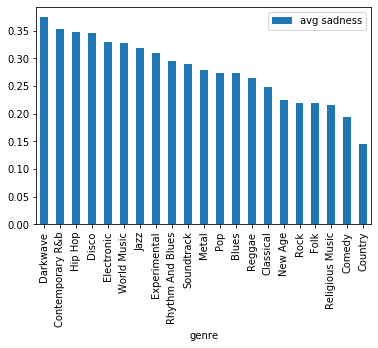

In [117]:
create_genre_avg_column_and_show('sadness')

### Harmonic mean 

In [43]:
df['harmonic mean X'] = df['chords'].apply(feature_extractor.extract_harmonic_mean_x)

In [44]:
df['harmonic mean Y'] = df['chords'].apply(feature_extractor.extract_harmonic_mean_y)

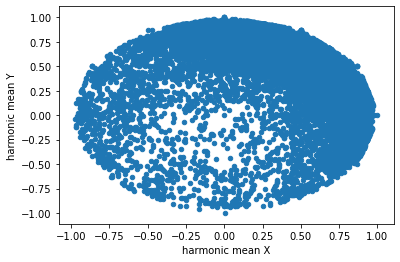

In [45]:
df.plot.scatter(x='harmonic mean X', y='harmonic mean Y')

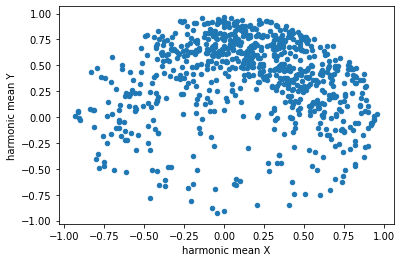

In [112]:
df[df['genre'].str.contains('Pop')].plot.scatter(x='harmonic mean X', y='harmonic mean Y')

In [46]:
df['harmonic mean position'] = df['chords'].apply(feature_extractor.extract_harmonic_mean_position)

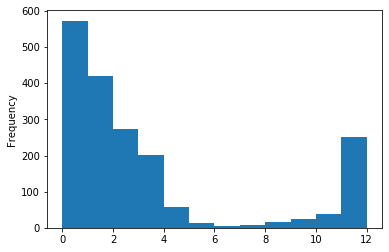

In [116]:
df[df['genre'].str.contains('Rock')]['harmonic mean position'].plot.hist(bins=12)

## Genre (to be improved) 

In [26]:
def remove_duplicate_genre_inside_cell(value):
    unique_genres = list(set(value.split('%%')))
    unique_genres.sort(key=str.lower)
    return '%%'.join(unique_genres)
    

df['genre'].apply(remove_duplicate_genre_inside_cell).unique()

array(['Folk', 'Folk%%Pop', 'Electronic', 'Classical%%Pop',
       'Electronic%%Pop', 'Jazz', 'Pop', 'Rock',
       'Contemporary R&b%%Rhythm And Blues', 'Rhythm And Blues',
       'World Music', 'Reggae', 'Metal', 'Hip Hop', 'Jazz%%Pop',
       'Hip Hop%%Rhythm And Blues', 'Jazz%%World Music', 'Disco',
       'Folk%%Jazz', 'Contemporary R&b', 'Electronic%%Rock',
       'Electronic%%Pop%%Rock', 'Disco%%Pop', 'Pop%%Rhythm And Blues',
       'Pop%%Rock', 'Contemporary R&b%%Hip Hop',
       'Religious Music%%Rhythm And Blues', 'Country', 'Folk%%Rock',
       'Blues', 'Contemporary R&b%%Electronic',
       'Electronic%%Rhythm And Blues', 'Folk%%Religious Music',
       'Religious Music', 'Pop%%Religious Music',
       'Jazz%%Rhythm And Blues', 'Contemporary R&b%%Pop', 'Metal%%Rock',
       'Darkwave', 'Blues%%Rock', 'Disco%%Pop%%Rock',
       'Folk%%Rhythm And Blues', 'Folk%%Pop%%Rock',
       'Disco%%Rhythm And Blues', 'Blues%%Rhythm And Blues',
       'Rhythm And Blues%%Rock', 'Country%%

## 